In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim.lr_scheduler as lr_scheduler
from torchmetrics.classification import MulticlassF1Score
import CNNutils as utils
import torch.optim as optim
import torch.nn as nn

In [4]:


# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                         download=False, transform=transforms.ToTensor())

# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=False, transform=transforms.ToTensor())

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
Batch_size=32
trainDL=DataLoader(trainset,batch_size=Batch_size)
testDL=DataLoader(testset,batch_size=Batch_size)

In [6]:
trainset[0][0][0].shape

torch.Size([32, 32])

In [7]:
((32/(2**2)))

8.0

In [8]:
model=utils.CNNmodel(3,len(classes),trainset[0][0][0].shape[0],Knums=[16,32,64,128],Pnums=[64,32,16])
optimizer=optim.Adam(model.parameters(),lr=0.001)
scheduler=lr_scheduler.ReduceLROnPlateau(optimizer,patience=5,factor=0.1,mode='max')
lossf=nn.CrossEntropyLoss()
scoref=MulticlassF1Score(num_classes=len(classes))

In [9]:
TRAIN=utils.Train_val(trainDL,testDL,model,optimizer,lossf,scoref)

In [10]:
EPOCH=20
history=TRAIN.train(EPOCH,scheduler,'1')

[1/20]
train loss 1.371064829353484, train score 0.43433545830987885
test loss 1.2784823179244995, test score 0.36571428179740906
scheduler.num_bad_epochs 0/5
[2/20]
train loss 1.0415118354600892, train score 0.5723727709367652
test loss 0.8940355181694031, test score 0.6000000238418579
scheduler.num_bad_epochs 0/5
[3/20]
train loss 0.8582934455103548, train score 0.6524396059952404
test loss 0.6918827891349792, test score 0.6208333373069763
scheduler.num_bad_epochs 0/5
[4/20]
train loss 0.73960226392868, train score 0.7005046948132726
test loss 0.6662083864212036, test score 0.6208333373069763
scheduler.num_bad_epochs 1/5
[5/20]
train loss 0.6539998748747874, train score 0.7327473221378912
test loss 0.9506157040596008, test score 0.4333333373069763
scheduler.num_bad_epochs 2/5
[6/20]
train loss 0.5860945335467199, train score 0.7584161239789986
test loss 0.560204029083252, test score 0.668749988079071
scheduler.num_bad_epochs 0/5
[7/20]
train loss 0.5278816575414464, train score 0.782

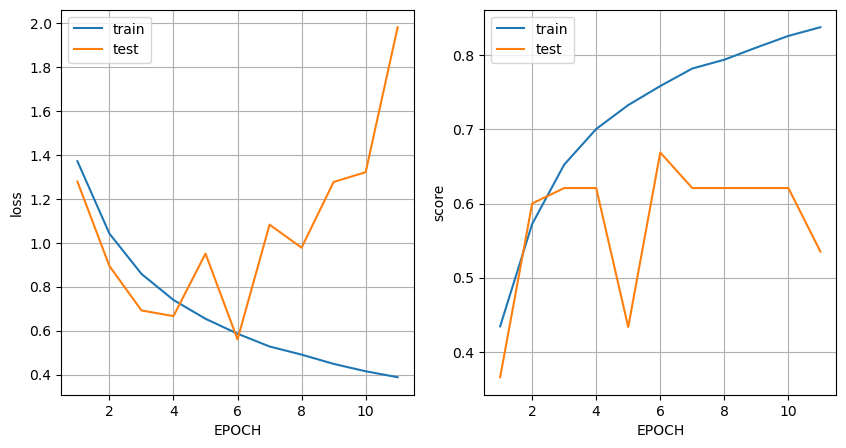

In [11]:
pp=utils.Plot_History(history)
pp.draw()